In [1]:
import torch
a=torch.zeros(2,3)
print(a)


tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [2]:


# 创建一个 2x3 的全 1 张量
b = torch.ones(2, 3)
print(b)

# 创建一个 2x3 的随机数张量
c = torch.randn(2, 3)
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[-1.7316,  0.2864, -0.9839],
        [ 0.5996, -0.4456,  0.3222]])


In [3]:
import numpy as np

array=np.array([[1,2,3],[4,5,6]])
tensor=torch.from_numpy(array)
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [4]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
d = torch.randn(2, 3, device=device)
print(d)

tensor([[ 0.5452,  2.0465,  0.6063],
        [ 1.7642, -0.0709,  0.4759]], device='cuda:0')


In [5]:

e = torch.randn(2, 3)
f = torch.randn(2, 3)
print(e + f)


tensor([[ 0.2465, -1.1786, -0.8196],
        [ 2.3271, -2.2759,  2.4745]])


In [6]:
print(e*f)

tensor([[-0.0616, -0.0081,  0.0735],
        [ 0.8515,  1.1619,  1.4748]])


In [7]:
g = torch.randn(3, 2)
print(g.t())  # 或者 g.transpose(0, 1)

# 张量的形状
print(g.shape)  # 返回形状

tensor([[ 0.1787,  1.3291,  0.3759],
        [-0.0228,  0.3530, -1.5102]])
torch.Size([3, 2])


In [8]:
# 创建一个需要梯度的张量
tensor_requires_grad = torch.tensor([1.0], requires_grad=True)

# 进行一些操作
tensor_result = tensor_requires_grad * 2

# 计算梯度
tensor_result.backward()
print(tensor_requires_grad.grad)  # 输出梯度

tensor([2.])


In [9]:
x = torch.randn(2, 2, requires_grad=True)
print(x)

# 执行某些操作
y = x + 2
z = y * y * 3
out = z.mean()

print(out)

tensor([[-1.2881, -1.3442],
        [ 0.1872, -0.0253]], requires_grad=True)
tensor(7.2151, grad_fn=<MeanBackward0>)


In [10]:
out.backward()

# 查看 x 的梯度
print(x.grad)

tensor([[1.0678, 0.9837],
        [3.2807, 2.9621]])


AttributeError: 'SimpleNN' object has no attribute 'fc1'

In [13]:
import torch.nn as nn
import torch.optim as optim

# 定义一个简单的全连接神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # 输入层到隐藏层
        self.fc2 = nn.Linear(2, 1)  # 隐藏层到输出层

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU 激活函数
        x = self.fc2(x)
        return x

# 创建网络实例
model = SimpleNN()

# 打印模型结构
print(model)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


In [14]:


import torch
import  torch.nn as nn
import torch.optim as optim
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # 输入层到隐藏层
        self.fc2 = nn.Linear(2, 1)  # 隐藏层到输出层

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU 激活函数
        x = self.fc2(x)
        return x
model= SimpleNN()
criterion = nn.MSELoss()  # 均方误差损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 优化

X = torch.randn(10, 2)  # 10 个样本，2 个特征
Y = torch.randn(10, 1)  # 10 个目标值

for epoch in range(100):  # 训练 100 轮
    optimizer.zero_grad()  # 清空之前的梯度
    output = model(X)  # 前向传播
    loss = criterion(output, Y)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    # 每 10 轮输出一次损失
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 1.5229
Epoch [20/100], Loss: 1.4721
Epoch [30/100], Loss: 1.4224
Epoch [40/100], Loss: 1.3759
Epoch [50/100], Loss: 1.3328
Epoch [60/100], Loss: 1.2929
Epoch [70/100], Loss: 1.2560
Epoch [80/100], Loss: 1.2219
Epoch [90/100], Loss: 1.1901
Epoch [100/100], Loss: 1.1605


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
iris=load_iris ()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # 特征数据
y = pd.Series(iris.target)  # 标签数据

# 显示前五行数据
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [17]:
# 划分训练集和测试集（80% 训练集，20% 测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# 创建 KNN 分类器
knn = KNeighborsClassifier(n_neighbors=3)

# 训练模型
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# 预测测试集
y_pred = knn.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'模型准确率: {accuracy:.2f}')

模型准确率: 1.00


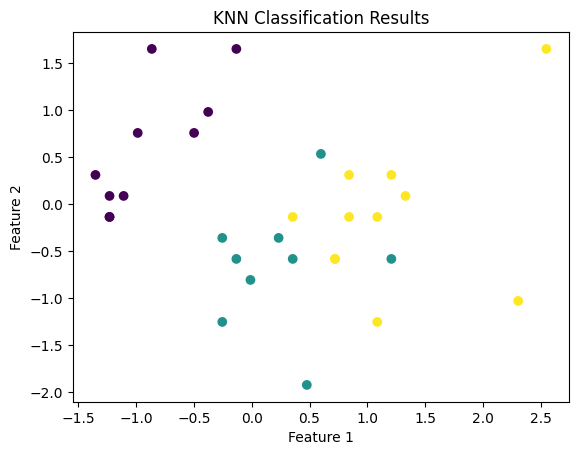

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = load_iris()

# 将数据转化为 pandas DataFrame
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # 特征数据
y = pd.Series(iris.target)  # 标签数据

# 划分训练集和测试集（80% 训练集，20% 测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 创建 KNN 分类器
knn = KNeighborsClassifier(n_neighbors=3)

# 训练模型
knn.fit(X_train, y_train)

# 预测测试集
y_pred = knn.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

# 可视化 - 这里只是一个简单示例，具体可根据实际情况选择绘图方式
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.title("KNN Classification Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [1]:
from torch.utils.data import Dataset
help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(typing.Generic)
 |  An abstract class representing a :class:`Dataset`.
 |  
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`. Subclasses could also
 |  optionally implement :meth:`__getitems__`, for speedup batched samples
 |  loading. This method accepts list of indices of samples of batch and returns
 |  list of samples.
 |  
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs an index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral ind